# Segmentacion


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Lectura de datos


jupyter-notebook stop

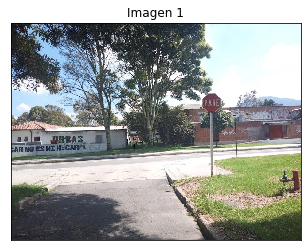

In [2]:
#lectura de las imágenes
ima1=cv2.imread("ima1.jpeg")
ima2=cv2.imread("ima2.jpeg")
ima3=cv2.imread("ima3.jpeg")
ima4=cv2.imread("ima4.jpeg")
ima5=cv2.imread("ima5.jpeg")
ima6=cv2.imread("ima6.jpeg")
#conversión de las imágenes de BGR a RGB
ima1=cv2.cvtColor(ima1,cv2.COLOR_BGR2RGB)
ima2=cv2.cvtColor(ima2,cv2.COLOR_BGR2RGB)
ima3=cv2.cvtColor(ima3,cv2.COLOR_BGR2RGB)
ima4=cv2.cvtColor(ima4,cv2.COLOR_BGR2RGB)
ima5=cv2.cvtColor(ima5,cv2.COLOR_BGR2RGB)
ima6=cv2.cvtColor(ima6,cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(ima4),plt.title('Imagen 1'),plt.xticks([]), plt.yticks([]);


(625, 833, 3)
[[-4.  0.  7. ... -1.  3.  0.]
 [-6. -5.  0. ...  0. -2.  3.]
 [-2. -5. -4. ...  0.  0. -1.]
 ...
 [ 6.  5.  5. ...  2.  1.  2.]
 [ 3.  3. -1. ...  2.  1.  0.]
 [-4. -5. -3. ...  1. -1.  4.]]
[[ 44  36  42 ... 249 249 249]
 [ 69  47  28 ... 250 250 249]
 [ 12  73  55 ... 250 250 249]
 ...
 [ 24  26  30 ...  36  36  37]
 [ 36  32  33 ...  34  33  37]
 [ 44  48  54 ...  41  29  37]]


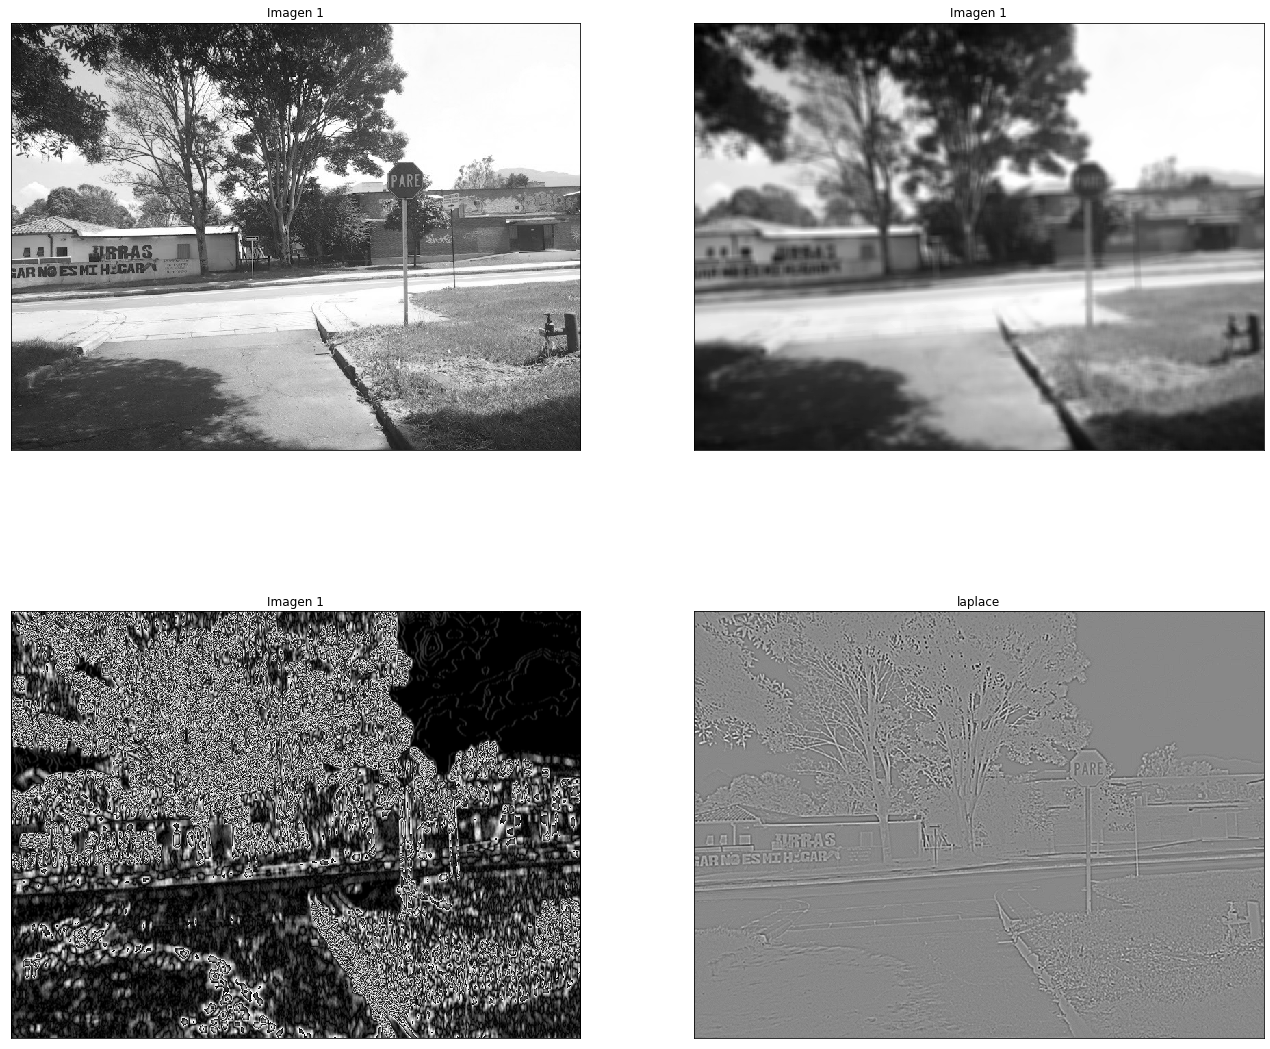

In [8]:



imagen = ima4
print(imagen.shape)
gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
filtered=gray
filtered = cv2.GaussianBlur(filtered,(5,5),0) #gausssiano
laplacian = cv2.Laplacian(filtered,cv2.CV_64F)

filtered = cv2.blur(gray,(10,10))


sobelx64f = cv2.Sobel(filtered,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

#_,th = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

#contornos1,hierarchy1 = cv2.findContours(th, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#contornos2,hierarchy2 = cv2.findContours(th, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#cv2.drawContours(imagen, contornos1, -1, (0,255,0), 3)

#print(len(contornos1)) #Cantidad de contornos
#print(contornos1[2]) #Donde se encuentra el contorno
#print(hierarchy1) #jerarquia

plt.figure(1)

plt.subplot(2,2,1)
plt.imshow(gray,cmap='gray'),plt.title('Imagen 1'),plt.xticks([]), plt.yticks([]);


plt.subplot(2,2,2)
plt.imshow(filtered,cmap='gray'),plt.title('Imagen 1'),plt.xticks([]), plt.yticks([]);

plt.subplot(2,2,3)
plt.imshow(sobel_8u,cmap='gray'),plt.title('Imagen 1'),plt.xticks([]), plt.yticks([]);


plt.subplot(2,2,4)
plt.imshow(laplacian,cmap='gray'),plt.title('laplace'),plt.xticks([]), plt.yticks([]);

plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
print(laplacian)
print(gray)

In [6]:

cv2.imshow('imagen',laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()


## cv2.findContours

In [1]:

imagen = ima3

gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
_,th = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

contornos1,hierarchy1 = cv2.findContours(th, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contornos2,hierarchy2 = cv2.findContours(th, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(imagen, contornos1, -1, (0,255,0), 3)

#print(len(contornos1)) #Cantidad de contornos
#print(contornos1[2]) #Donde se encuentra el contorno
#print(hierarchy1) #jerarquia


cv2.imshow('imagen',imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'ima3' is not defined

In [ ]:

contornos1,hierarchy1 = cv2.findContours(th, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contornos2,hierarchy2 = cv2.findContours(th, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(imagen, contornos2, -1, (0,255,0), 3)

#print(len(contornos1)) #Cantidad de contornos
#print(contornos1[2]) #Donde se encuentra el contorno
#print(hierarchy1) #jerarquia


cv2.imshow('imagen',imagen)
#cv2.imshow('th',th)

cv2.waitKey(0)
cv2.destroyAllWindows()

## cv2.HoughLines

In [11]:
import cv2
import numpy as np

img = cv2.imread('dave.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imshow('edges',edges)
cv2.waitKey(0)

lines = cv2.HoughLines(edges,1,np.pi/180, 200)

# The below for loop runs till r and theta values 
# are in the range of the 2d array
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
          
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be 
    #drawn. In this case, it is red. 
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2)
      
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
#cv2.imwrite('linesDetected.jpg', img)
cv2.imshow('LinesDetected',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## cv2.HoughLinesP

In [12]:
import cv2
import numpy as np

img = cv2.imread('dave.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imshow('houghline',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## cv2.HoughCircles

In [20]:
img = cv2.imread('monedas.jpg')
GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
GrayImage= cv2.medianBlur(GrayImage,5)
ret,th1 = cv2.threshold(GrayImage,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(GrayImage,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,5)  
th3 = cv2.adaptiveThreshold(GrayImage,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,5)


kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(th2,kernel,iterations=1)
dilation = cv2.dilate(erosion,kernel,iterations=1)

imgray=cv2.Canny(erosion,30,100)

circles = cv2.HoughCircles(imgray,cv2.HOUGH_GRADIENT,1,20,
                            param1=20,param2=20,minRadius=10,maxRadius=40)

circles = np.uint16(np.around(circles))
#print(circles)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
print(len(circles[0,:]))

cv2.imshow('detected circles',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

24


## cv2.floodFill

In [21]:
import cv2
import numpy as np

tolerancia = 1
point = (0, 0)

def floodFill():
    src = img.copy()

    connectivity = 4
    flags = connectivity
    flags |= cv2.FLOODFILL_FIXED_RANGE

    cv2.floodFill(src, None, point, (0, 255, 255), (tolerancia,) * 3, (tolerancia,) * 3, flags)
    cv2.imshow('relleno', src)

def mouse_clic(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        global point
        point = (x, y)
        floodFill()

def trackbar_value(value):
    global tolerancia
    tolerancia = value
    floodFill()


global img

winname = 'Flood fill'
img = cv2.imread('image.png')

cv2.namedWindow(winname)
cv2.setMouseCallback(winname, mouse_clic, img)
cv2.createTrackbar('Tolerancia', winname, tolerancia, 100, trackbar_value)

while(1):
    cv2.imshow(winname, img)
    if cv2.waitKey(0) :
        break

cv2.destroyAllWindows()
    


## cv2.watershed

In [22]:
img = cv2.imread('monedas.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [23]:
# Eliminación del ruido
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
 
# Encuentra el área del fondo
sure_bg = cv2.dilate(opening,kernel,iterations=3)
 
# Encuentra el área del primer
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Encuentra la región desconocida (bordes)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [24]:
# Etiquetado
ret, markers = cv2.connectedComponents(sure_fg)
 
# Adiciona 1 a todas las etiquetas para asegurra que el fondo sea 1 en lugar de cero
markers = markers+1
 
# Ahora se marca la región desconocida con ceros
markers[unknown==255] = 0

In [25]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]


cv2.imshow("binarizada",thresh)
cv2.imshow("sin ruido",opening)
cv2.imshow("area de fondo",sure_bg)
cv2.imshow("area de frente",sure_fg)
cv2.imshow("distancia",dist_transform)
cv2.imshow("bordes",unknown)
cv2.imshow("regiones",img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Merge and Split

<Figure size 432x288 with 0 Axes>

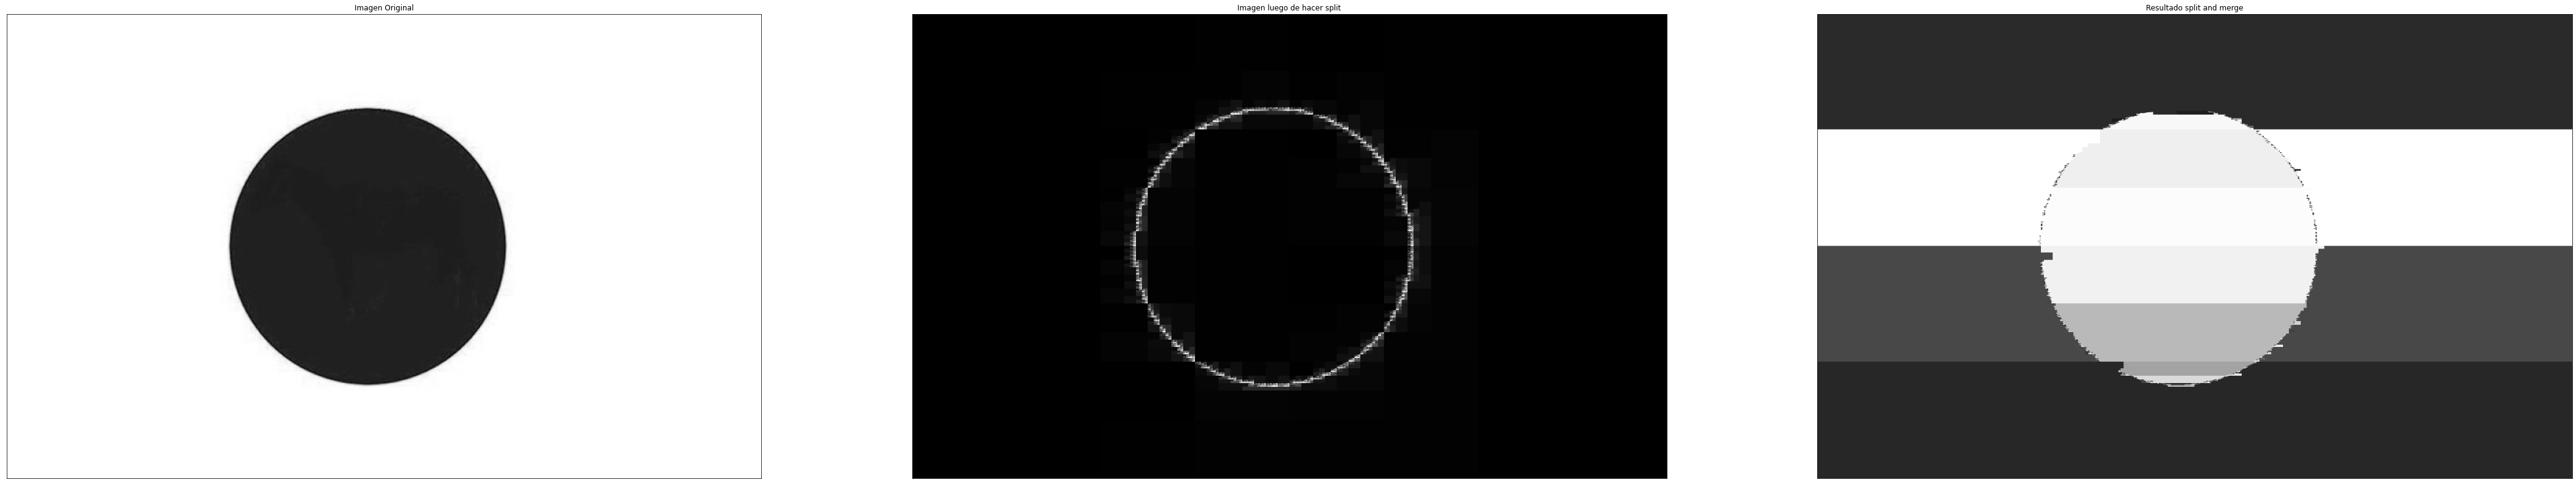

In [9]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('reto_circulo.jpg', 0)

def homogeneous(imagen):
   return np.var(imagen) < 75
  
def split(imagen):
  regiones = np.zeros((imagen.shape[0],imagen.shape[1]), dtype=np.uint)
  num_regiones = 1  
  inicio = False
  while not inicio:
    inicio = True
    
    for i in range(num_regiones):
      region = np.array((regiones==i).nonzero())
      if not homogeneous(img[region[0], region[1]]) and region.shape[1] >= 4:
        start = np.min(region, axis=1)  
        length = np.max(region, axis=1)-start+1
        regiones[start[0]+int(length[0]/2): start[0]+length[0], start[1]: start[1] + int(length[1]/2)] = num_regiones
        regiones[start[0]: start[0]+int(length[0]/2), start[1]+int(length[1]/2):start[1] + length[1]] = num_regiones+1
        regiones[start[0]+int(length[0]/2):start[0]+length[0], start[1]+int(length[1]/2):start[1]+length[1]] = num_regiones+2
        num_regiones += 3
        inicio = False
  return regiones

img_split = split(img)

def merge(imagen, regiones):
                
  for x in range(img.shape[0]-1):
    for y in range(img.shape[1]-1):
      current = regiones[x, y] 
      if regiones[x+1,y] != current:
        region_actual = np.array((regiones==current).nonzero())
        region_siguiente = np.array((regiones==regiones[x+1,y]).nonzero())
        nueva_region = np.concatenate((region_actual, region_siguiente), axis=1)
        if homogeneous(imagen[nueva_region[0], nueva_region[1]]):
          regiones[region[0], region[1]] = current
      
      if regiones[x,y+1] != current:
        region_actual = np.array((regiones==current).nonzero())
        region = np.array((regiones==regiones[x,y+1]).nonzero())
        nueva_region = np.concatenate((region_actual, region), axis=1)
        if homogeneous(imagen[nueva_region[0], nueva_region[1]]):
          regiones[region[0], region[1]] = current
           
  return regiones

merged = merge(img, np.copy(img_split))

plt.figure(1)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2); plt.imshow(img_split, cmap='gray'); plt.title('Imagen luego de hacer split'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3); plt.imshow(merged, cmap='gray'); plt.title('Resultado split and merge'), plt.xticks([]), plt.yticks([])
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
plt.show()